In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [69]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [4]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
all_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    #bot experiment loop
    FileName=row.linkingFileNamePack
    bot_num_current=row.bots
    starting_frame=read_time(row.start_min)
    data=pd.read_csv(passive_path+'\\'+FileName,index_col=0)
    relevant_data=data.iloc[starting_frame:len(data)].reset_index()
    relevant_data['Filename']=[FileName]*len(relevant_data)
    relevant_data['BotNum']=[row.bots]*len(relevant_data)
    relevant_data['BotType']=[row.bottype]*len(relevant_data)
    all_data=pd.concat([all_data,relevant_data],axis=0)
all_data.to_csv(passive_path+'\\all_linking_passive_data_28cm.csv')

In [7]:
print(relevant_data)

       frame  frame.1      x      y      r  particle  \
0        851      851  658.5  557.5  103.2         0   
1        852      852  657.5  560.5  105.4         0   
2        853      853  659.5  557.5  104.3         0   
3        854      854  658.5  557.5  103.2         0   
4        855      855  658.5  557.5  103.2         0   
...      ...      ...    ...    ...    ...       ...   
29421  30272    30272  345.5  872.5  104.3         0   
29422  30273    30273  344.5  871.5  103.2         0   
29423  30274    30274  345.5  872.5  104.3         0   
29424  30275    30275  345.5  869.5  104.3         0   
29425  30276    30276  344.5  870.5  103.2         0   

                                   Filename  BotNum  BotType  
0      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
1      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
2      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
3      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
4      align

aligner_N021_D028_C0495.MP4_link.csv
[ 1.41594891 -3.59805656]
[0.00083436 0.00335706]


Text(0, 0.5, 'MSD $\\left[\\rm{cm}^2\\right]$')

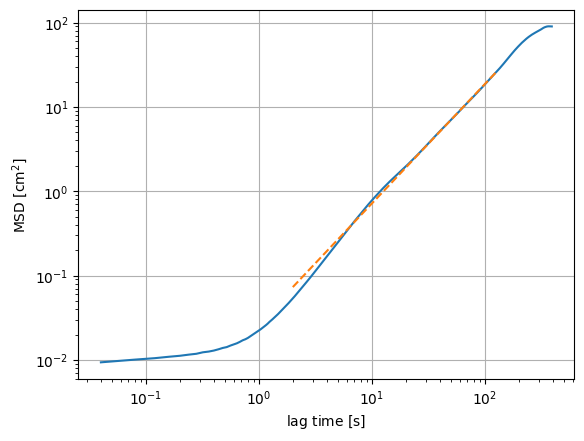

In [106]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
expnum=49
exp_row=expSumPassive.iloc[expnum]
expnun_Filename=exp_row.linkingFileNamePack
print(expnun_Filename)
data=all_data[(all_data['Filename']==expnun_Filename)]
relevant_data_try = tp.filter_stubs(data,threshold=100)
max_lagtime=int(len(relevant_data)/3)
imsd_try = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
last_imsd_try=imsd_try.index[-1]
lag_time_thresh=int(last_imsd_try/150)
max_lagtime_thresh=int(last_imsd_try/3)
relevant_imsd=imsd_try.loc[lag_time_thresh:max_lagtime_thresh]
#relevant_imsd=imsd_try.loc[10:50]
fig,ax = plt.subplots()
#ax.plot(np.log(imsd_try.index),np.log(imsd_try),label='msd')
ax.loglog(imsd_try.index,imsd_try,label='msd')
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd.index),np.log(relevant_imsd.iloc[:,0]),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fit_x=np.log(relevant_imsd.index)
fit_y=fit_x*popt[0]+popt[1]
ax.loglog(np.exp(fit_x),np.exp(fit_y),'--')
#ax.plot(df.frame,df.x)
#ax.plot(df.frame,df.y)
x = np.linspace(1,10,10)
y = 0.02E0*x**1.75
#ax.loglog(x,y,'--',label='1.75')
#ax.axis([0.01,2000,0.01,1E4])
ax.grid()

ax.set_xlabel(r'lag time $\left[\rm{s}\right]$')
ax.set_ylabel(r'MSD $\left[\rm{cm}^2\right]$')

In [104]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
power_law=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    current_data=all_data[(all_data['Filename']==FileName)]
    relevant_data_try = tp.filter_stubs(data,threshold=100)
    max_lagtime=int(len(relevant_data)/3)
    imsd = tp.imsd(current_data,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
    last_imsd_try=imsd.index[-1]
    lag_time_thresh=int(last_imsd_try/150)
    max_lagtime_thresh=int(last_imsd_try/3)
    relevant_imsd_max=imsd.loc[lag_time_thresh:max_lagtime_thresh]
    relevant_imsd_min=imsd.loc[10:50]
    p0=np.array([2,0.5])
    popt_max,pcov_max = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd_max.index),np.log(relevant_imsd_max.iloc[:,0]),p0=p0)
    perr_max = np.sqrt(np.diag(pcov_max))
    corr_max=np.corrcoef(pcov_max,rowvar=True)
    popt_min,pcov_min = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd_min.index),np.log(relevant_imsd_min.iloc[:,0]),p0=p0)
    perr_min = np.sqrt(np.diag(pcov_min))
    corr_min=np.corrcoef(pcov_min,rowvar=True)
    data_row=pd.DataFrame()
    data_row['FileName']=[FileName]
    data_row['n_max']=[popt_max[0]]
    data_row['n_max_err']=[perr_max[0]]
    data_row['A_max']=[np.exp(popt_max[1])]
    data_row['A_max_err']=[perr_max[1]]
    data_row['n_min']=[popt_min[0]]
    data_row['n_min_err']=[perr_min[0]]
    data_row['A_min']=[np.exp(popt_min[1])]
    data_row['A_min_err']=[perr_min[1]]
    data_row['Bot_Type']=row.bottype
    data_row['Bot_num']=row.bots
    power_law=pd.concat([power_law,data_row],axis=0)
power_law.to_csv(passive_path+'\\power_law_28cm_diameter.csv')

fronter_N001_D028_C0556.MP4_link.csv
fronter_N001_D028_C0555.MP4_link.csv
fronter_N001_D028_C0554.MP4_link.csv
fronter_N001_D028_C0553.MP4_link.csv
aligner_N001_D028_C0575.MP4_link.csv
aligner_N001_D028_C0574.MP4_link.csv
aligner_N001_D028_C0573.MP4_link.csv
aligner_N001_D028_C0572.MP4_link.csv
fronter_N004_D028_C0560.MP4_link.csv
fronter_N004_D028_C0559.MP4_link.csv
fronter_N004_D028_C0558.MP4_link.csv
fronter_N004_D028_C0557.MP4_link.csv
aligner_N004_D028_C0580.MP4_link.csv
aligner_N004_D028_C0579.MP4_link.csv
aligner_N004_D028_C0578.MP4_link.csv
aligner_N004_D028_C0577.MP4_link.csv
aligner_N004_D028_C0576.MP4_link.csv
fronter_N008_D028_C0567.MP4_link.csv
fronter_N008_D028_C0566.MP4_link.csv
fronter_N008_D028_C0565.MP4_link.csv
fronter_N008_D028_C0563.MP4_link.csv
fronter_N008_D028_C0562.MP4_link.csv
aligner_N008_D028_C0587.MP4_link.csv
aligner_N008_D028_C0586.MP4_link.csv
aligner_N008_D028_C0585.MP4_link.csv
aligner_N008_D028_C0584.MP4_link.csv
aligner_N008_D028_C0583.MP4_link.csv
a

In [113]:
mean_data=power_law.groupby(by=["Bot_Type","Bot_num"]).mean()
print(mean_data.loc[("fronter","n_min")])
std_data=power_law.groupby(by=["Bot_num","Bot_Type"]).std()
print(std_data)

Bot_num
1     0.910912
4     1.723835
8     1.600187
16    1.744326
21    1.526883
53    1.598582
Name: n_min, dtype: float64
                     n_max  n_max_err     A_max  A_max_err     n_min  \
Bot_num Bot_Type                                                       
1       aligner   0.299767   0.000199  0.004822   0.000802  0.422468   
        fronter   0.843416   0.001339  0.575813   0.005386  0.941768   
4       aligner   0.209182   0.000730  0.007757   0.002938  0.228993   
        fronter   0.046815   0.000512  0.006424   0.002061  0.040079   
8       aligner   0.233844   0.000627  0.007633   0.002524  0.253094   
        fronter   0.133829   0.000790  0.012820   0.003180  0.157255   
16      aligner   0.074152   0.000930  0.006122   0.003740  0.057802   
        fronter   0.105443   0.000675  0.021273   0.002718  0.077690   
21      aligner   0.254821   0.000591  0.029224   0.002379  0.219531   
        fronter   0.189652   0.000693  0.037639   0.002788  0.232963   
53      al

C:\Users\User\AppData\Local\Temp\ipykernel_9968\331693062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=power_law.groupby(by=["Bot_Type","Bot_num"]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_9968\331693062.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=power_law.groupby(by=["Bot_num","Bot_Type"]).std()


IndexingError: Too many indexers

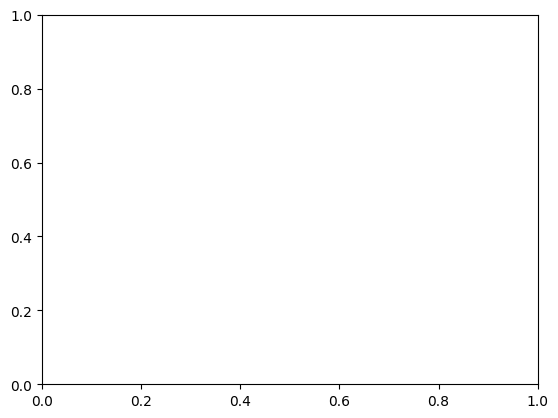

In [126]:
fronter_data=mean_data.loc[("fronter","n_min")]
fronter_data_max= mean_data.loc[("fronter","n_max")]
fronter_diff=fronter_data-fronter_data_max
aligner_data=mean_data.loc[("aligner","n_min")]
aligner_data_max=mean_data.loc[("aligner","n_max")]
aligner_diff=aligner_data-aligner_data_max
fig,ax = plt.subplots()
ax.errorbar(fronter_data.index,fronter_data,'-o',label='fronter_n_min',yerr=fronter_diff.iloc[:,0])
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(aligner_data.index,aligner_data,'-o',label='aligners_n_min',yerr=aligner_diff.iloc[:,0])
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Bot number N')
ax.set_ylabel('Power law')
ax.legend()